<a href="https://www.kaggle.com/code/shruthiiiee/analysis-of-apple-quality?scriptVersionId=161812449" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Classification Analysis of Apple Quality Dataset 🍎📊

In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('/kaggle/input/apple-quality/apple_quality.csv')
df.head(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [2]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [4]:
import plotly.express as px

numeric_df = df.drop(columns=['A_id', 'Acidity', 'Quality'])
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')
fig = px.imshow(numeric_df.corr(), x=numeric_df.columns, y=numeric_df.columns, color_continuous_scale='Blues')

fig.update_layout(
    title='Correlation Heatmap',
    xaxis=dict(title='Attributes'),
    yaxis=dict(title='Attributes'),
)

fig.show()

In [5]:
good_percentage = (df['Quality'] == 'good').mean() * 100
bad_percentage = (df['Quality'] == 'bad').mean() * 100

fig = px.pie(names=['Good', 'Bad'], values=[good_percentage, bad_percentage],
             title='Imbalance Distribution',
             color_discrete_sequence=['darkblue', 'lightgrey'],
             labels={'label': 'Quality', 'value': 'Percentage'},
             hole=0.3)

fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1])
fig.show()


In [6]:
fig = px.histogram(df, x='Size', nbins=20, title='Histogram of Size')
fig.show()


In [7]:
feature = ['Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

for feature in feature:
    fig = px.scatter(df, x=feature, y='Size', title=f'Scatter Plot: Size vs {feature}', labels={feature: feature, 'Size': 'Size'})
    fig.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

warnings.filterwarnings("ignore")

df1_encoded = df.apply(LabelEncoder().fit_transform)

X = df1_encoded[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
y = df1_encoded['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7440699126092385

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       391
           1       0.75      0.75      0.75       410

    accuracy                           0.74       801
   macro avg       0.74      0.74      0.74       801
weighted avg       0.74      0.74      0.74       801



In [9]:
import plotly.figure_factory as ff

cm = confusion_matrix(y_test, y_pred)
labels = ['Negative', 'Positive']
fig = ff.create_annotated_heatmap(cm, x=labels, y=labels, colorscale='Blues')
fig.update_layout(title='Confusion Matrix')
fig.show()

In [10]:
from sklearn.model_selection import cross_val_score, GridSearchCV

scores = cross_val_score(log_reg_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(log_reg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

training_score = log_reg_model.score(X_train, y_train)
cv_score = grid_search.best_score_
print("Training Accuracy:", training_score)
print("Cross-Validation Accuracy:", cv_score)


Cross-Validation Accuracy Scores: [0.68913858 0.69125    0.7575     0.70625    0.6925    ]
Mean Accuracy: 0.7073277153558053
Best Hyperparameters: {'C': 0.001}
Best Cross-Validation Accuracy: 0.7155777153558052
Training Accuracy: 0.7215625
Cross-Validation Accuracy: 0.7155777153558052


## Conclusion:

### Performance of Logistic Regression Model:
- The logistic regression model achieved an accuracy of 74.41% on the test dataset, indicating that it correctly classified about three-fourths of the apple samples.
- In terms of precision, recall, and F1-score, the model performed consistently well for both classes, with values around 0.74-0.75. This suggests that the model is effective in distinguishing between good and bad quality apples.
- Looking at the confusion matrix, we can see that the model made a balanced number of correct and incorrect predictions for each class, reflecting its ability to classify apples accurately.

### Cross-Validation and Hyperparameter Tuning:
- Cross-validation was used to evaluate the model's performance more robustly by training and testing it on multiple subsets of the data. The average accuracy across different folds was approximately 70.73%.
- Hyperparameter tuning was performed using grid search, which identified the optimal regularization parameter (C value) of 0.001. This resulted in a slightly improved cross-validation accuracy of around 71.56%.
- Although the model showed a training accuracy of 72.16%, indicating a slight tendency to overfit the data, the cross-validation accuracy remained relatively close, suggesting that the model's performance is consistent across different data splits.

In conclusion, the logistic regression model demonstrates promising performance in classifying the quality of apples based on their attributes. While it provides a good starting point, further refinements and explorations could enhance its accuracy and generalization ability.

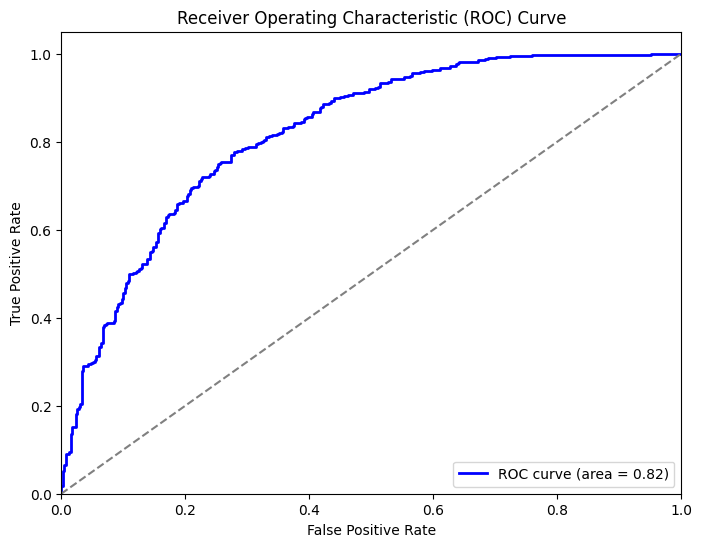

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = log_reg_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


> ## Your time spent exploring this notebook is valued! ˎˊ˗⋆｡°✩📄
> ## If you've found it insightful and beneficial, please consider giving it an Upvote. Don't hesitate to share your analysis ideas in the comments below. Until next time, happy analyzing!